In [191]:
import pypsa as psa
import networkx as nx
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
import json
sys.path.insert(1,'../LV_Net/')
import func as translate

In [192]:
json_Path = 'C:/Users/u6352049/Downloads/'
file = 'D_LV_network.json'
f = open(json_Path + file)
data = json.load(f)

net = translate.to_pypsa(data)

In [193]:
# demand = pd.read_csv('E:/Shubhankar/2022-01-26.csv',usecols=['systemid','load_p','load_q','timestamp'])
demand = pd.read_csv('E:/Shubhankar/2022-01-26.csv',usecols=['systemid','export_p','export_q','timestamp'])
demand.export_p = demand.export_p/1000
demand.export_q = demand.export_q/1000
# demand['export_p'] =demand.load_p/1000
# demand['export_q'] =demand.load_q/1000

In [194]:
print(len(demand.timestamp.unique()))

288


In [195]:
dx = demand.groupby('systemid', as_index=False).count()
da = dx[dx.timestamp==288]
da.head

demand_2 = demand[demand.systemid.isin(da.systemid.unique())]
demand_2.sort_values(['timestamp','systemid'], inplace=True)

C:\Users\u6352049\AppData\Local\Temp\ipykernel_24520\803625311.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


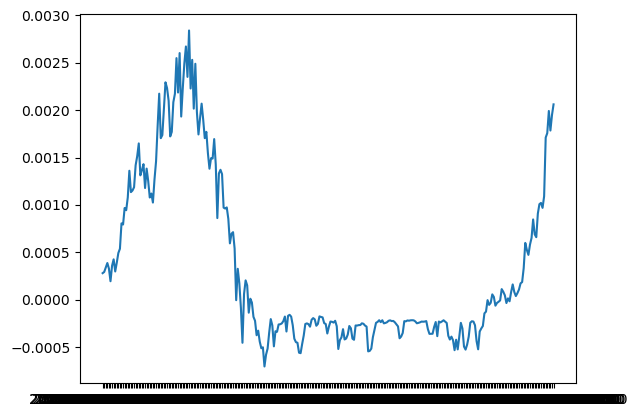

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


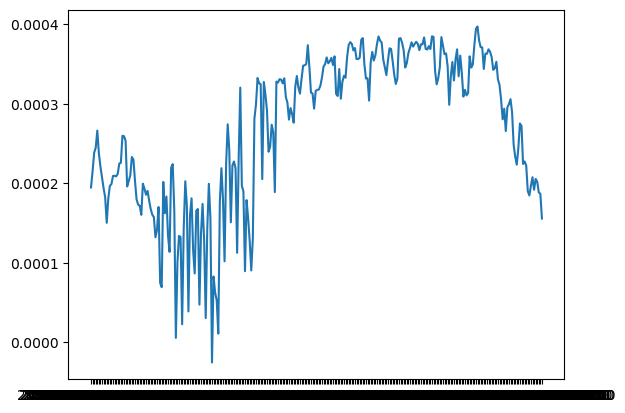

In [210]:
dx = demand_2.groupby('timestamp', as_index=False).mean()
plt.plot(dx.timestamp, dx.export_p)
plt.show()
plt.plot(dx.timestamp, dx.export_q)
plt.show()

In [197]:
ts = demand_2.timestamp.to_list()[0]
print(demand_2[demand_2.timestamp==ts].head(30))


demand_2 = demand_2[demand_2.systemid !=25772]

     systemid  export_p  export_q            timestamp
0       10001  0.001058  0.000411  2022-01-26 00:00:00
6       10146  0.000010  0.000525  2022-01-26 00:00:00
14      10514  0.000502  0.000003  2022-01-26 00:00:00
25      11181  0.000037  0.000334  2022-01-26 00:00:00
51      12287  0.000025  0.000152  2022-01-26 00:00:00
53      12399  0.000000  0.000000  2022-01-26 00:00:00
63      12587  0.000021  0.000508  2022-01-26 00:00:00
79      13371  0.001086  0.000263  2022-01-26 00:00:00
87      13550  0.001459  0.000069  2022-01-26 00:00:00
88      13592  0.000561 -0.000045  2022-01-26 00:00:00
93      13778  0.000019  0.000504  2022-01-26 00:00:00
109     14753  0.000485  0.000091  2022-01-26 00:00:00
129     15448 -0.001300 -0.000607  2022-01-26 00:00:00
133     15682  0.000002 -0.000611  2022-01-26 00:00:00
171     17584  0.000081  0.000365  2022-01-26 00:00:00
176     17750 -0.000008  0.000659  2022-01-26 00:00:00
193     18665 -0.000093  0.000144  2022-01-26 00:00:00
209     19

In [198]:
print(net.loads.index)
print(demand_2.systemid.unique())

Index(['My load 0', 'My load 1', 'My load 2', 'My load 3', 'My load 4',
       'My load 5', 'My load 6', 'My load 7', 'My load 8', 'My load 9',
       'My load 10', 'My load 11', 'My load 12', 'My load 13', 'My load 14',
       'My load 15', 'My load 16', 'My load 17', 'My load 18', 'My load 19',
       'My load 20', 'My load 21', 'My load 22', 'My load 23', 'My load 24',
       'My load 25', 'My load 26', 'My load 27', 'My load 28', 'My load 29',
       'My load 30', 'My load 31', 'My load 32', 'My load 33', 'My load 34',
       'My load 35', 'My load 36', 'My load 37', 'My load 38', 'My load 39',
       'My load 40', 'My load 41', 'My load 42', 'My load 43', 'My load 44',
       'My load 45', 'My load 46', 'My load 47', 'My load 48', 'My load 49',
       'My load 50', 'My load 51', 'My load 52', 'My load 53', 'My load 54',
       'My load 55', 'My load 56', 'My load 57', 'My load 58', 'My load 59',
       'My load 60', 'My load 61', 'My load 62', 'My load 63', 'My load 64',
       'M

In [199]:
net.snapshots = sorted(demand_2.timestamp.unique())


In [200]:
count = 0
c_max = len(demand_2.systemid.unique())
load_samples = demand_2.systemid.unique()
for i in net.loads.index.to_list():
    ex_p = np.array(demand_2[demand_2.systemid==load_samples[count]].export_p.to_list(), dtype=np.float16)
    ex_q = np.array(demand_2[demand_2.systemid==load_samples[count]].export_q.to_list(), dtype=np.float16)
    count+=1
    if count>=c_max:
        count =0
    net.loads_t.p_set[i] = ex_p
    net.loads_t.q_set[i] = ex_q

In [201]:
i = net.generators.index
# net.generators.loc[i, 'bus'] = "My bus 57_0"
net.generators.loc[i,'p_nom'] = 0.1
net.generators.loc[i,'p_nom_min'] = 0.0
net.generators.loc[i,'p_nom_max'] = 10
net.generators.loc[i,'p_max_pu'] = 10
net.generators.loc[i,'p_min_pu'] = 0
# net.generators_t.p_max_pu['My gen 0'] = np.array(np.repeat(100,288), dtype=np.float16)
# net.generators_t.p_min_pu['My gen 0'] = np.array(np.repeat(0,288), dtype=np.float16)

net.generators.loc[i,'p_set'] = 0
net.generators.loc[i,'q_set'] = 0
net.generators.loc[i,'q_nom'] = 1.0
net.generators.loc[i,'marginal_cost'] = 1.0
net.generators.loc[i,'p_nom_extendable']=True
net.generators.loc[i,'control'] = 'Slack'


In [202]:
psa.Network.consistency_check(net)

In [203]:
net.lpf(snapshots=net.snapshots[0])
now = net.snapshots[0]
angle_diff = pd.Series(net.buses_t.v_ang.loc[now,net.lines.bus0].values -
                       net.buses_t.v_ang.loc[now,net.lines.bus1].values,
                       index=net.lines.index)

print((angle_diff*180/np.pi).describe())

INFO:pypsa.pf:Performing linear load-flow on AC sub-network SubNetwork 0 for snapshot(s) Index(['2022-01-26 00:00:00'], dtype='object', name='snapshot')


count    9.400000e+01
mean     1.602371e-05
std      7.799520e-05
min     -1.985673e-06
25%     -2.876876e-07
50%     -1.326764e-08
75%      1.698599e-19
max      5.370870e-04
dtype: float64


In [204]:
translate.plotly_net(net, title=None);
# net.iplot(layouter=nx.kamada_kawai_layout)

In [205]:
net.lpf()
net.pf(use_seed=True)

INFO:pypsa.pf:Performing linear load-flow on AC sub-network SubNetwork 0 for snapshot(s) Index(['2022-01-26 00:00:00', '2022-01-26 00:05:00', '2022-01-26 00:10:00',
       '2022-01-26 00:15:00', '2022-01-26 00:20:00', '2022-01-26 00:25:00',
       '2022-01-26 00:30:00', '2022-01-26 00:35:00', '2022-01-26 00:40:00',
       '2022-01-26 00:45:00',
       ...
       '2022-01-26 23:10:00', '2022-01-26 23:15:00', '2022-01-26 23:20:00',
       '2022-01-26 23:25:00', '2022-01-26 23:30:00', '2022-01-26 23:35:00',
       '2022-01-26 23:40:00', '2022-01-26 23:45:00', '2022-01-26 23:50:00',
       '2022-01-26 23:55:00'],
      dtype='object', name='snapshot', length=288)
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['2022-01-26 00:00:00', '2022-01-26 00:05:00', '2022-01-26 00:10:00',
       '2022-01-26 00:15:00', '2022-01-26 00:20:00', '2022-01-26 00:25:00',
       '2022-01-26 00:30:00', '2022-01-26 00:35:00', '2022-01-26 00:40:00',
       '2022-

{'n_iter': SubNetwork           0
 snapshot              
 2022-01-26 00:00:00  1
 2022-01-26 00:05:00  1
 2022-01-26 00:10:00  1
 2022-01-26 00:15:00  1
 2022-01-26 00:20:00  1
 ...                 ..
 2022-01-26 23:35:00  2
 2022-01-26 23:40:00  2
 2022-01-26 23:45:00  2
 2022-01-26 23:50:00  2
 2022-01-26 23:55:00  2
 
 [288 rows x 1 columns],
 'error': SubNetwork                      0
 snapshot                         
 2022-01-26 00:00:00  2.947534e-07
 2022-01-26 00:05:00  3.340576e-07
 2022-01-26 00:10:00  4.137134e-07
 2022-01-26 00:15:00  4.714832e-07
 2022-01-26 00:20:00  4.662162e-07
 ...                           ...
 2022-01-26 23:35:00  2.255462e-10
 2022-01-26 23:40:00  2.982876e-10
 2022-01-26 23:45:00  5.747402e-10
 2022-01-26 23:50:00  6.257012e-10
 2022-01-26 23:55:00  4.510874e-10
 
 [288 rows x 1 columns],
 'converged': SubNetwork              0
 snapshot                 
 2022-01-26 00:00:00  True
 2022-01-26 00:05:00  True
 2022-01-26 00:10:00  True
 2022-01-26 

In [206]:
def fun_plot(net2, frame):
    gen = net2.generators.bus.to_list()
    load = net2.loads.bus.to_list()
    passive = net2.buses.index.to_list()
    valid = [i for i in passive if i not in gen]
    passive = [i for i in valid if i not in load]

    node_type = sorted([(int(i.split(' ')[2]), ' Gen ') for i in gen] + [(int(i.split(' ')[2]), ' Load ') for i in load] + [
        (int(i.split(' ')[2]), ' Passive ') for i in passive])
    node_type = [i[1] for i in node_type]
    bs_value = ['{:.2f}'.format(i) for i in net2.buses_t.p.max().tolist()]
    # bs_value = ['{:.}'.format(i) for i in net2.buses_t.p.max().tolist()]
    bs_text = net2.buses.index.to_list()
    bs_text = [' '.join(i.split(' ')[1:]) + ': ' for i in bs_text]
    bs_text = zip(bs_text, node_type, bs_value)
    bs_text = [''.join(i) for i in bs_text]

    # Color information
    bs_color = dict()
    for i in net2.buses.index:
        if i in gen:
            c = -1.1
        if i in load:
            c= 1.1
        if i in passive:
            c=0.01
        bs_color[i] = c

    bs_size = dict()
    for i in net2.buses.index:
        val = net2.buses_t.p[i][frame]
        bs_size[i] =0.2*np.log(np.abs(val)+1)+0.0001

    fig = plt.Figure()
    fig = net2.plot(title='Graph of Sample Network Frame: {}'.format(frame), bus_colors=bs_color, bus_cmap='RdYlGn_r',
                    bus_sizes=bs_size,
                    line_colors=np.abs(net2.lines_t.p0.max().tolist()), line_cmap='winter',
                    line_widths=(6* np.abs(net2.lines_t.p0.max().tolist())/max(np.abs(net2.lines_t.p0.max().tolist())))+1,
                    flow='mean',
                    # flow='mean',
                    layouter=nx.kamada_kawai_layout,
                    margin=0.2, geomap=False)
    # plt.text(0, -0.5, 'Generators', ha='center', color='limegreen', weight='bold')
    # plt.text(1.5, -0.5, 'Loads', ha='center', color='lightcoral', weight='bold')
    # plt.text(3, -0.5, 'Passive', ha='center', color='darkgoldenrod', weight='bold')
    plt.colorbar(fig[1], label='Line Loads', extend = 'both')
    # plt.text(5, -1, str(frame), ha='center', color='darkgoldenrod', weight='bold', animated=True)
    return fig


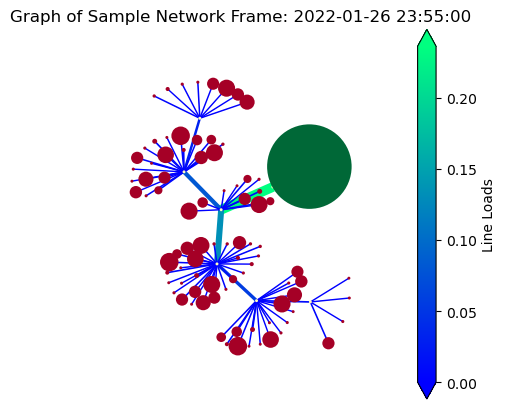

In [207]:

for s in range(len(net.snapshots)):
    snap = net.snapshots[s]
    # net.lpf(snapshots=snap)
    # net.pf(snapshots=snap, use_seed=True)
    plt.clf()
    fig = fun_plot(net, snap)
    plt.savefig('image/'+ str(s).zfill(5) +'.png')


In [208]:
gen = sorted(net.generators.bus.to_list())
load = sorted(net.loads.bus.to_list())
passive = [i for i in sorted(net.buses.index.to_list()) if i not in gen + load]
print('gen', len(gen))
print('load', len(load))
print('passive', len(passive))
print(" Bus", len(net.buses.index.to_list()))
print(' Houses', len(load))


gen 1
load 87
passive 7
 Bus 95
 Houses 87


In [209]:
import os
from PIL import Image
file = sorted(os.listdir('image/'))
ims = []
for i in file:
    np_frame = np.array(Image.open('image/'+i))
    ims.append(np_frame)

frames = [Image.open('image/'+image) for image in file]
frame_one = frames[0]
frame_one.save("network_process.gif", format="GIF", append_images=frames, save_all=True, duration=100, loop=1)

# frames = [Image.open('imangle/'+image) for image in file]
# frame_one = frames[0]
# frame_one.save("network_angle.gif", format="GIF", append_images=frames, save_all=True, duration=200, loop=1)
